In [252]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [323]:
data = pd.read_csv('default of credit card clients.csv')
data.head(10)
nRow, nCol = data.shape
print(f'There are {nRow} rows and {nCol} columns')
data.head(10)

There are 30000 rows and 25 columns


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [255]:
data.duplicated().sum()

0

In [256]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

In [257]:
data.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
dpnm             2
dtype: int64

In [258]:
print('EDUCATION : ', data.EDUCATION.unique())
print('MARRIAGE   : ', data.MARRIAGE.unique())
print('dpnm         : ', data.dpnm.unique())
print('PAY_1         : ', data.PAY_1.unique())
print('PAY_2         : ', data.PAY_2.unique())
print('PAY_3         : ', data.PAY_3.unique())
print('PAY_4         : ', data.PAY_4.unique())
print('PAY_5         : ', data.PAY_5.unique())
print('PAY_6         : ', data.PAY_6.unique())

EDUCATION :  [2 1 3 5 4 6 0]
MARRIAGE   :  [1 2 3 0]
dpnm         :  [1 0]
PAY_1         :  [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2         :  [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3         :  [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4         :  [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5         :  [-2  0 -1  2  3  5  4  7  8  6]
PAY_6         :  [-2  2  0 -1  3  6  4  7  8  5]


In [259]:
pd.set_option('display.max_columns', None)
data.head(15)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


### Exploratory Data Analysis

<AxesSubplot:ylabel='LIMIT_BAL'>

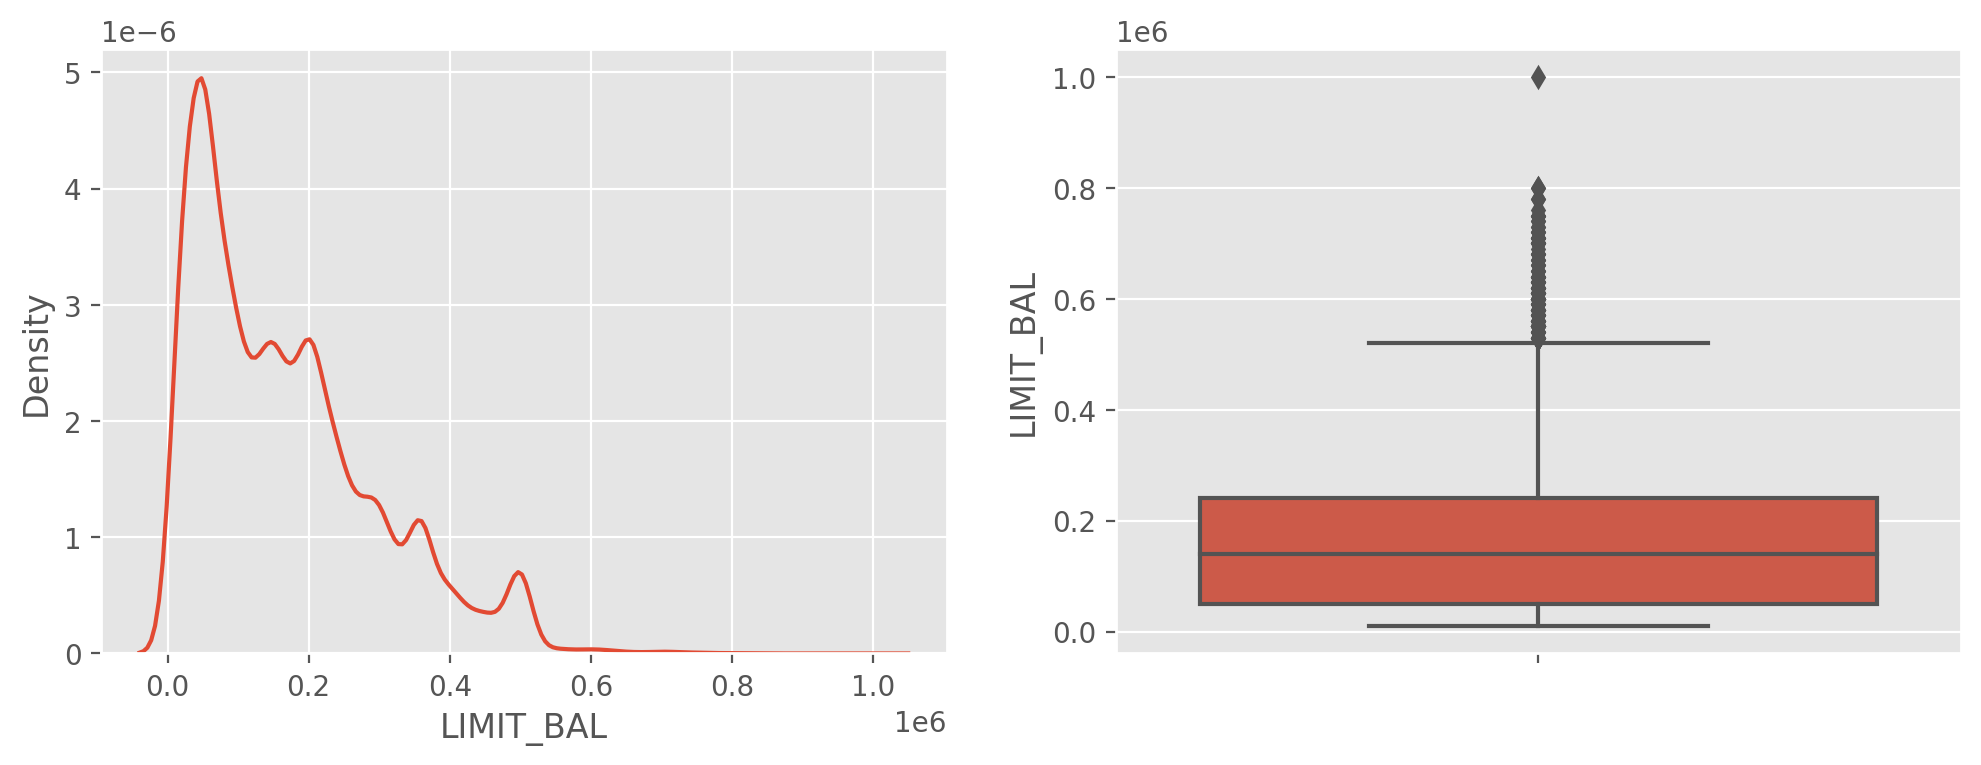

In [260]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(data.LIMIT_BAL, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data.LIMIT_BAL)

<AxesSubplot:ylabel='AGE'>

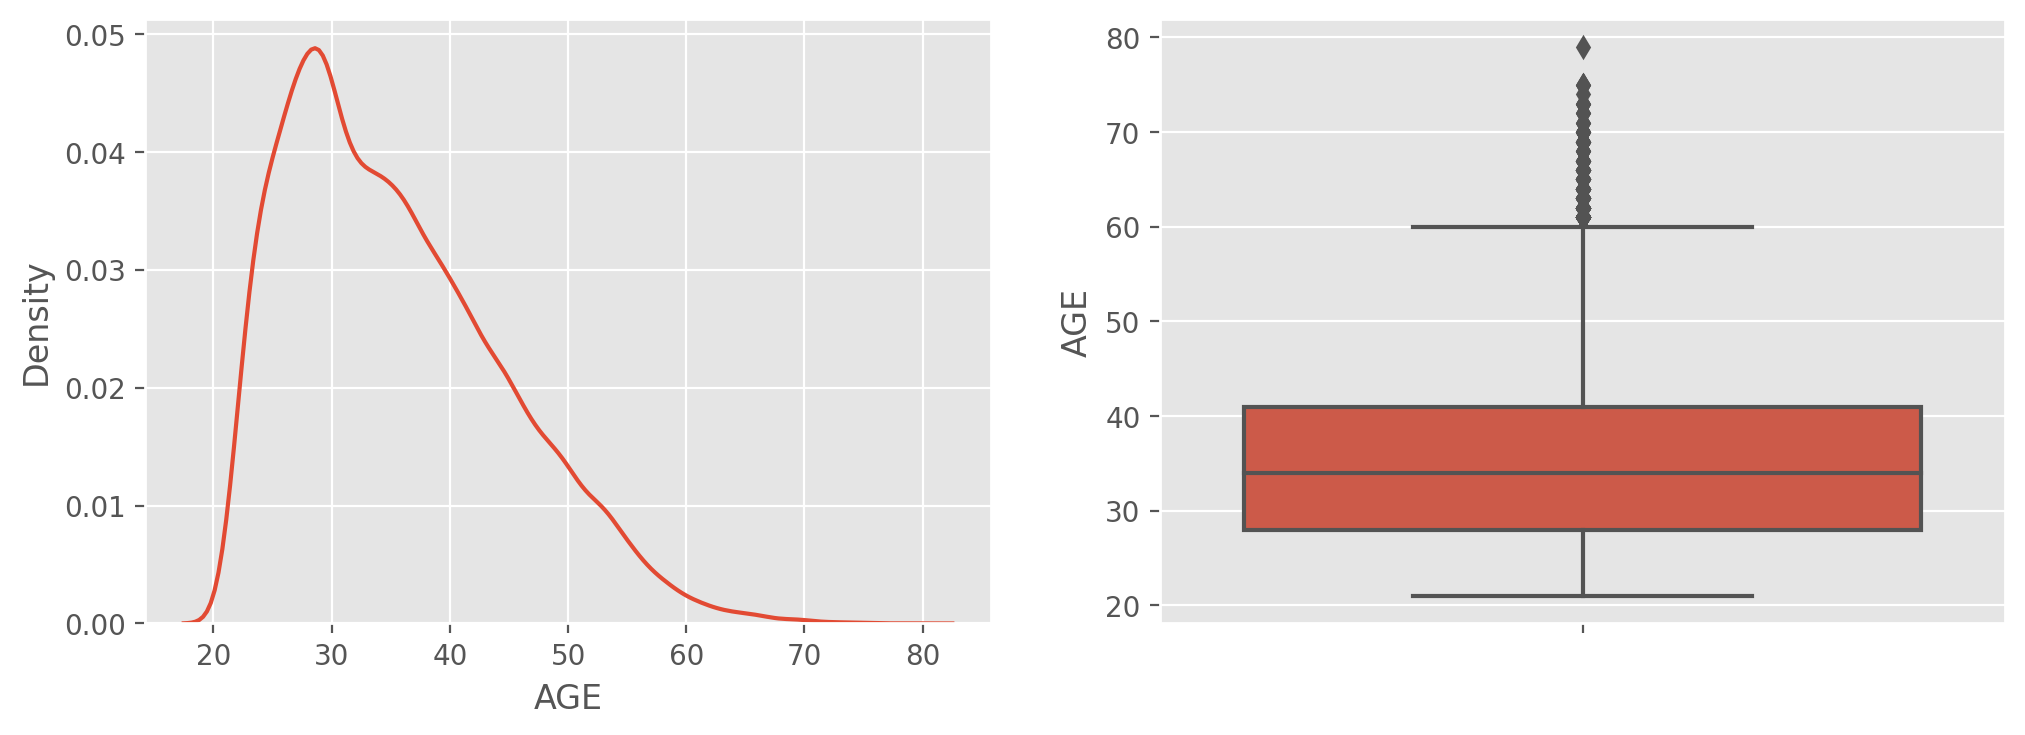

In [262]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(data.AGE, hist = False)
plt.subplot(1,2,2)
sns.boxplot(y = data.AGE)

<AxesSubplot:xlabel='dpnm', ylabel='count'>

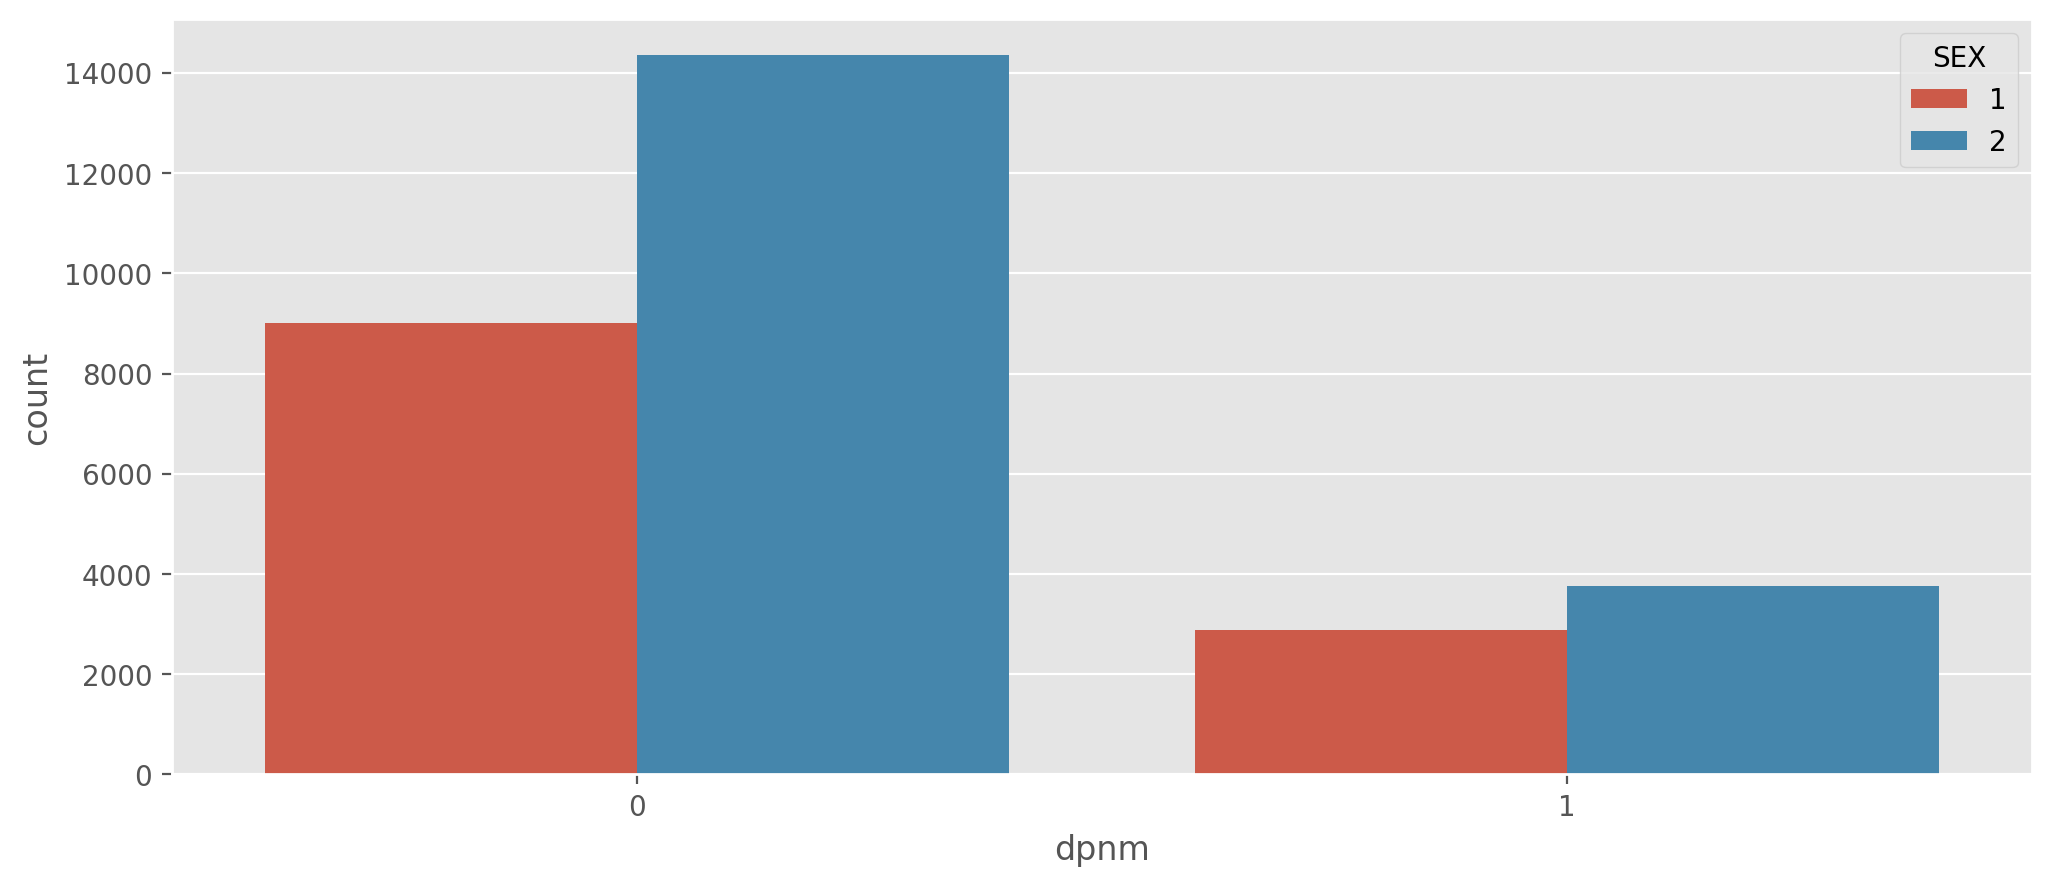

In [263]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.SEX, hue = data.dpnm)

<AxesSubplot:xlabel='dpnm', ylabel='count'>

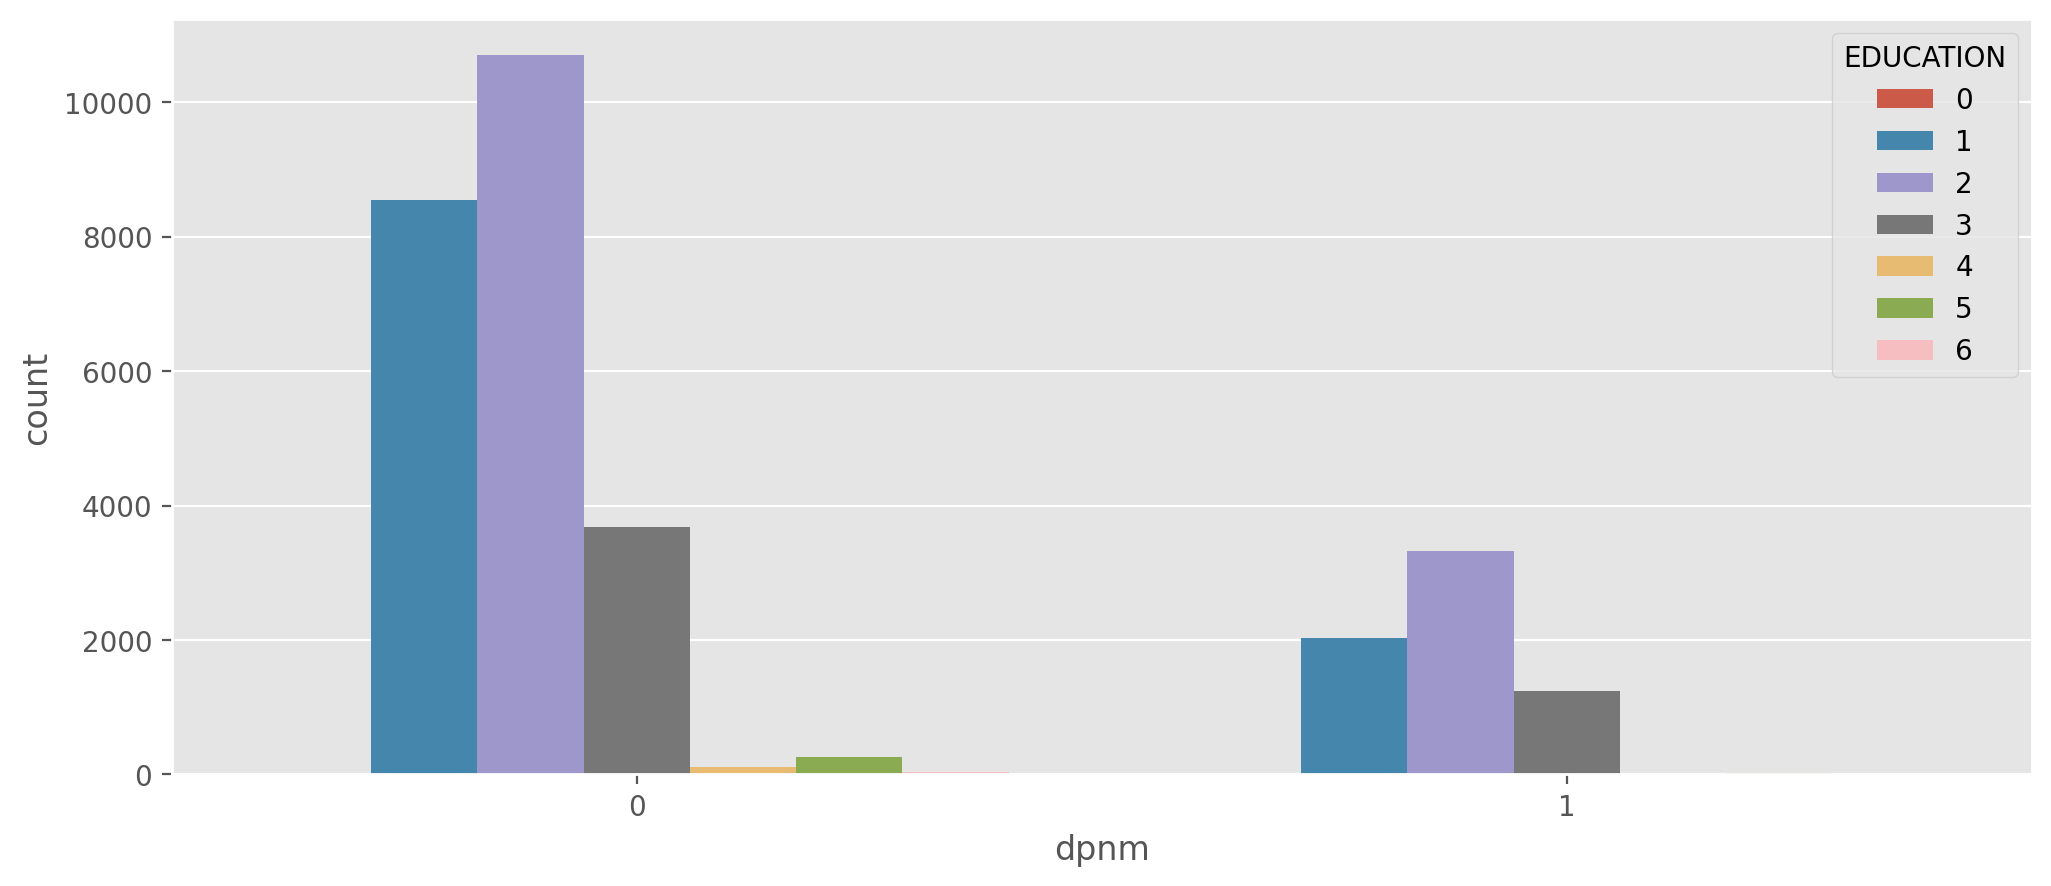

In [264]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.EDUCATION, hue = data.dpnm)

<AxesSubplot:xlabel='dpnm', ylabel='count'>

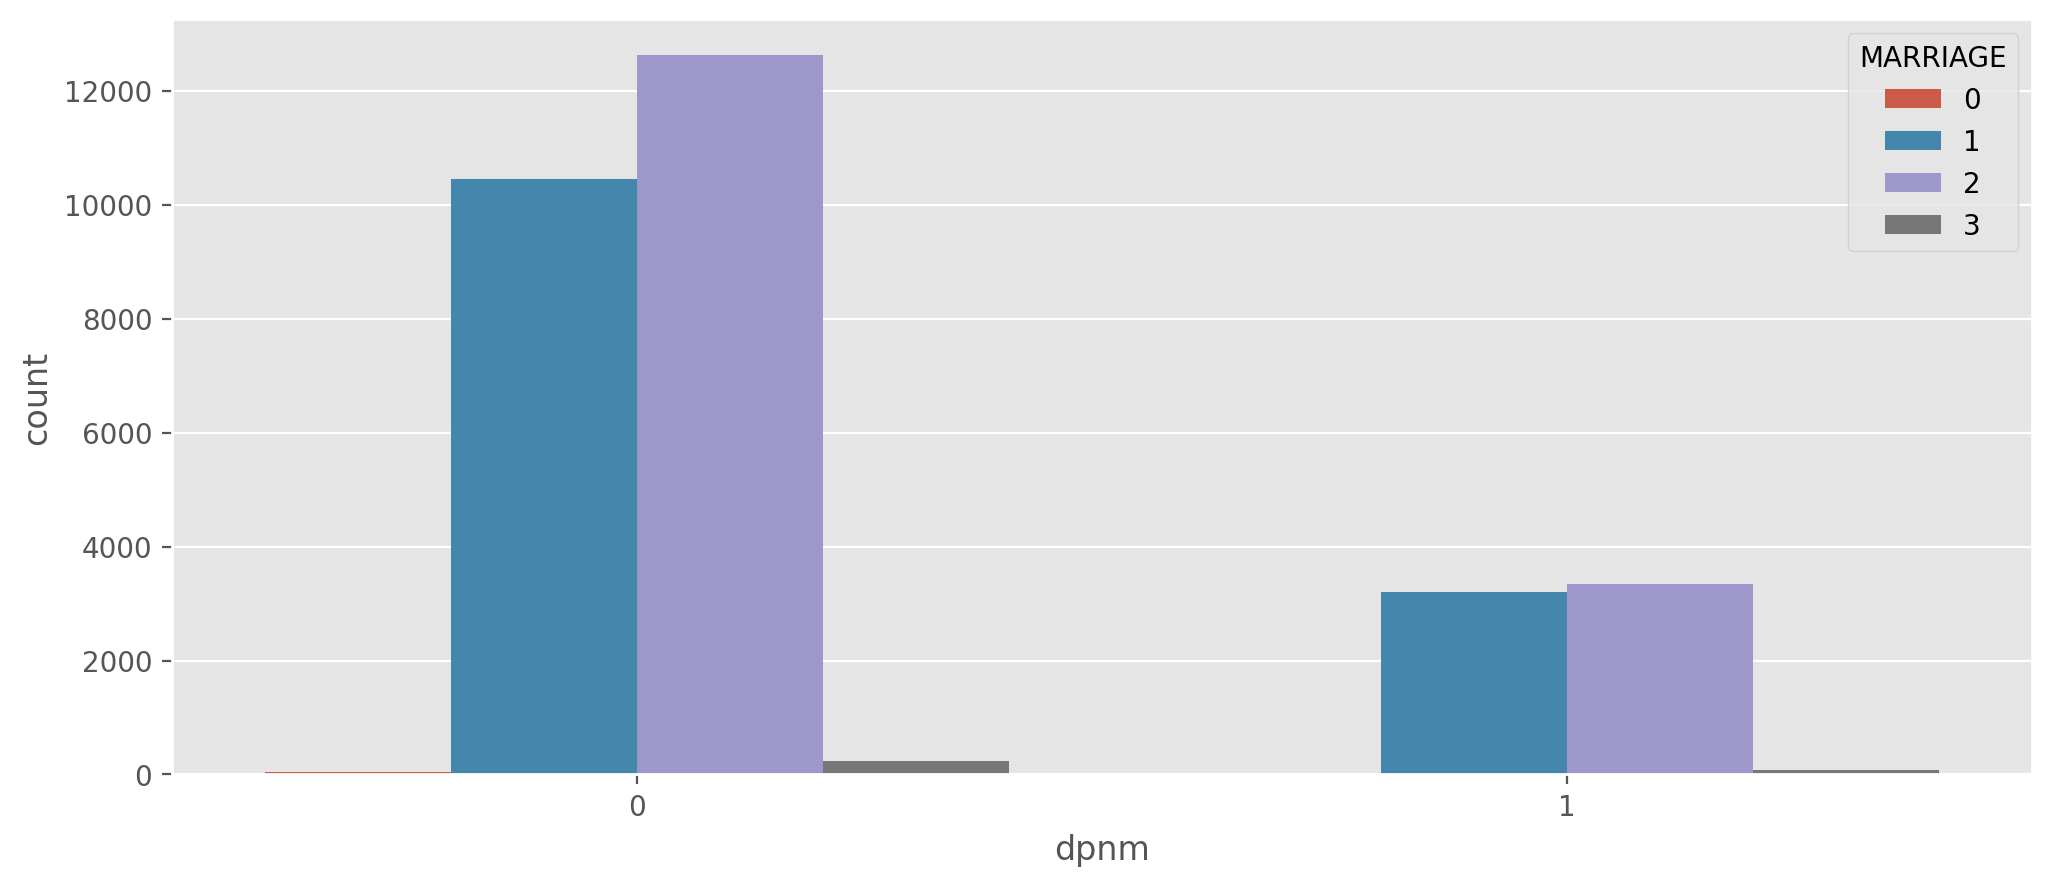

In [265]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.MARRIAGE, hue = data.dpnm)

<AxesSubplot:xlabel='dpnm', ylabel='count'>

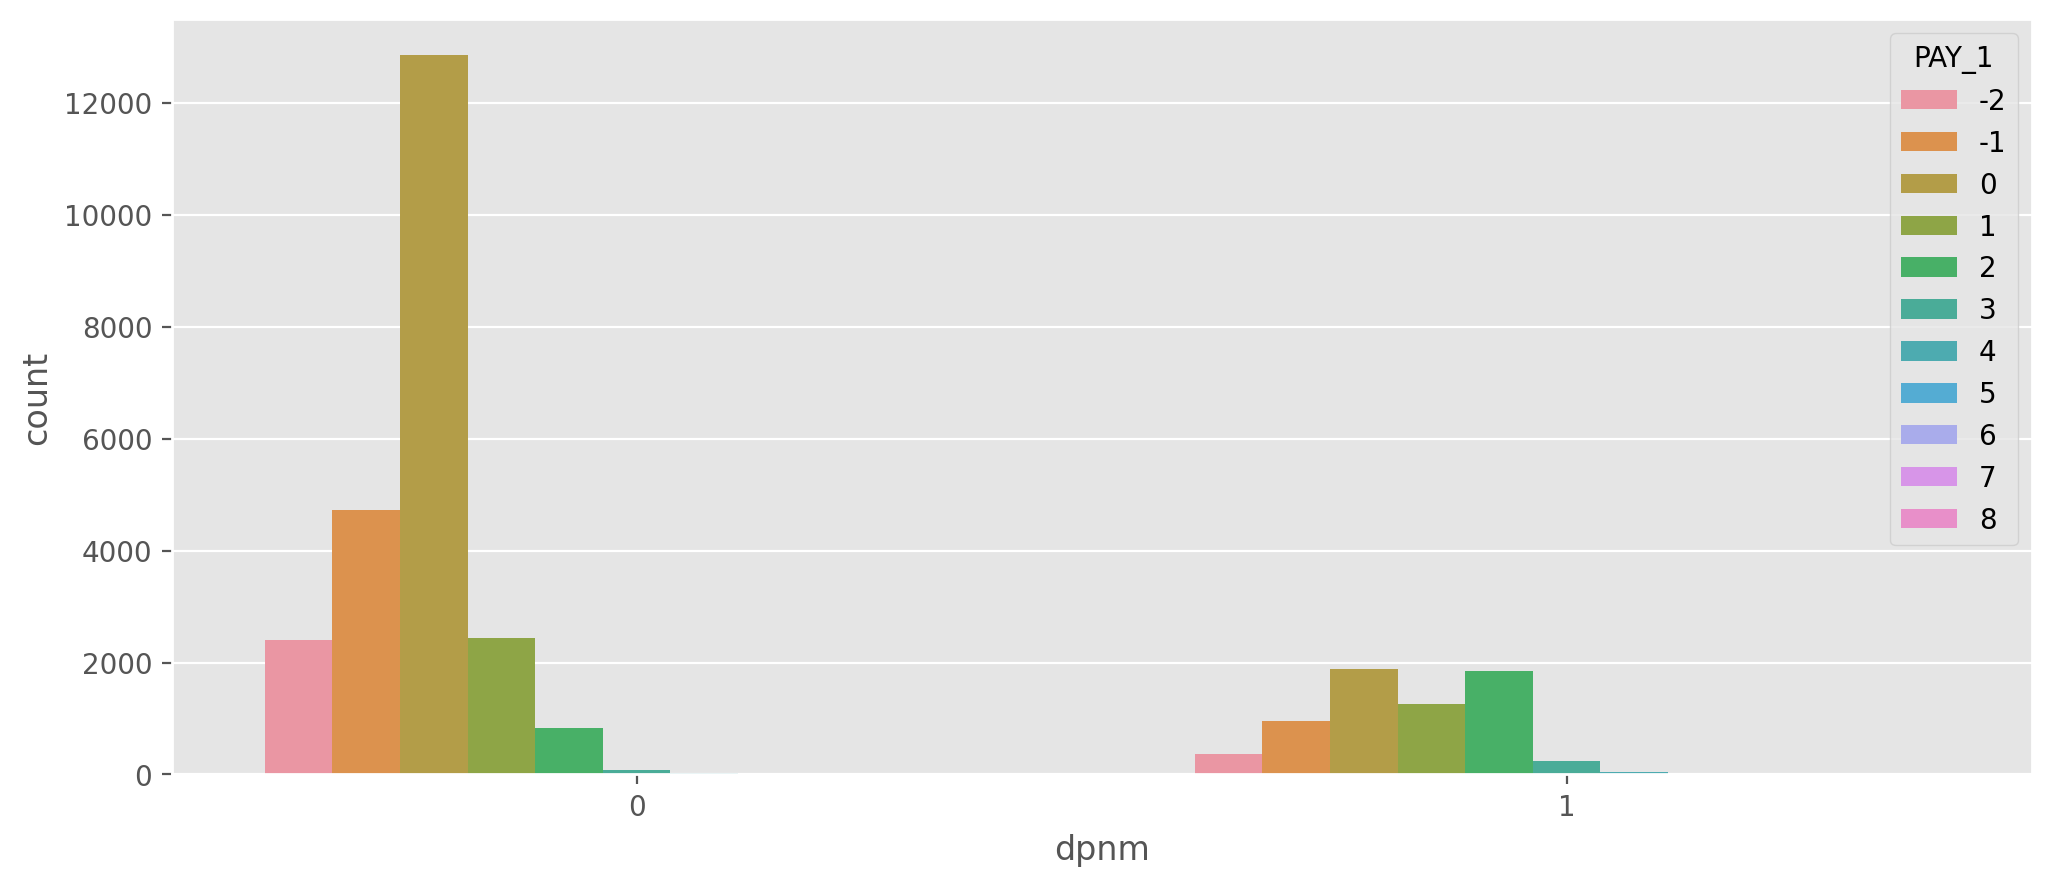

In [266]:
plt.figure(figsize = (12,5), dpi = 200)
sns.countplot(data.PAY_1, hue = data.dpnm)

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='dpnm'>

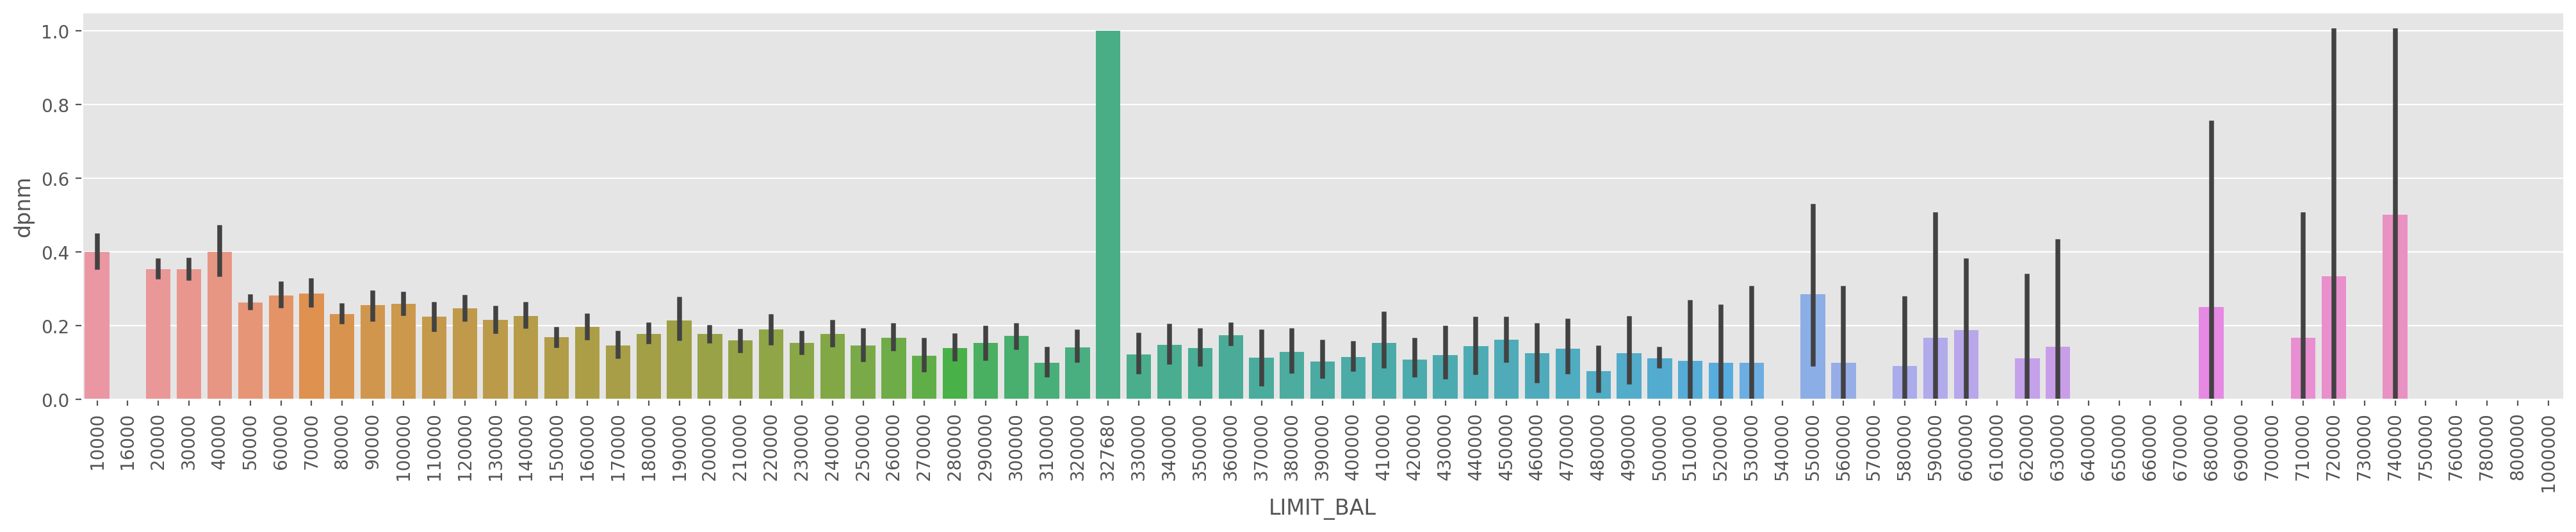

In [270]:
plt.figure(figsize = (25,4), dpi = 200)
plt.xticks(rotation = 90)
sns.barplot('LIMIT_BAL', 'dpnm', data = data)

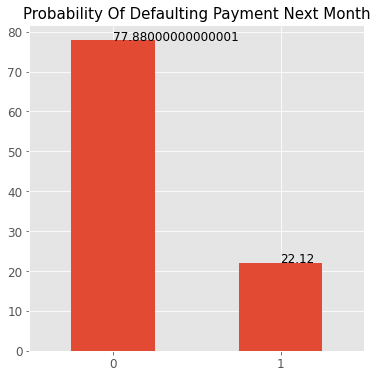

In [277]:
def_cnt = (data.dpnm.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

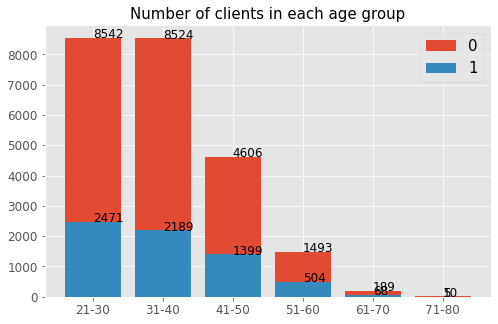

In [280]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
data['AGE_BIN'] = pd.cut(x=data.AGE, bins=bins, labels=names, right=True)

age_cnt = data.AGE_BIN.value_counts()
age_0 = (data.AGE_BIN[data['dpnm'] == 0].value_counts())
age_1 = (data.AGE_BIN[data['dpnm'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

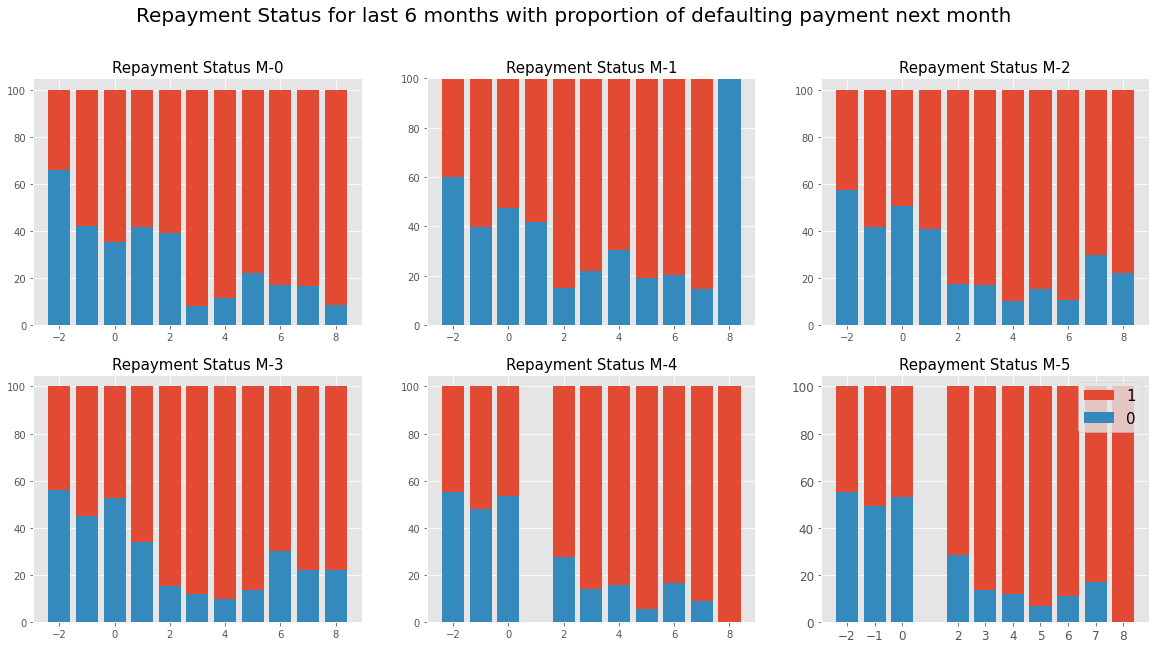

In [281]:
plt.subplots(figsize=(20,10))

ind = sorted(data.PAY_1.unique())
pay_0 = (data.PAY_1[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_1[data['dpnm'] == 1].value_counts(normalize=True))
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(231)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-0", fontsize=15)

ind = sorted(data.PAY_2.unique())
pay_0 = (data.PAY_2[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_2[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(232)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-1", fontsize=15)

ind = sorted(data.PAY_3.unique())
pay_0 = (data.PAY_3[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_3[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(233)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-2", fontsize=15)

ind = sorted(data.PAY_4.unique())
pay_0 = (data.PAY_4[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_4[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(234)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-3", fontsize=15)

ind = sorted(data.PAY_5.unique())
pay_0 = (data.PAY_5[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_5[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(235)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-4", fontsize=15)

ind = sorted(data.PAY_6.unique())
pay_0 = (data.PAY_6[data['dpnm'] == 0].value_counts(normalize=True))
pay_1 = (data.PAY_6[data['dpnm'] == 1].value_counts(normalize=True))
for i in pay_0.index:
    if i not in pay_1.index:
        pay_1[i]=0
for i in pay_1.index:
    if i not in pay_0.index:
        pay_0[i]=0
total = pay_0.values+pay_1.values
pay_0_prop = np.true_divide(pay_0, total)*100
pay_1_prop = np.true_divide(pay_1, total)*100
plt.subplot(236)
plt.bar(ind, pay_1_prop, bottom=pay_0_prop, label='1')
plt.bar(ind, pay_0_prop, label='0')
plt.title("Repayment Status M-5", fontsize=15)

plt.xticks(ind, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc="upper right", fontsize=15)
plt.suptitle("Repayment Status for last 6 months with proportion of defaulting payment next month", fontsize=20)

plt.show()


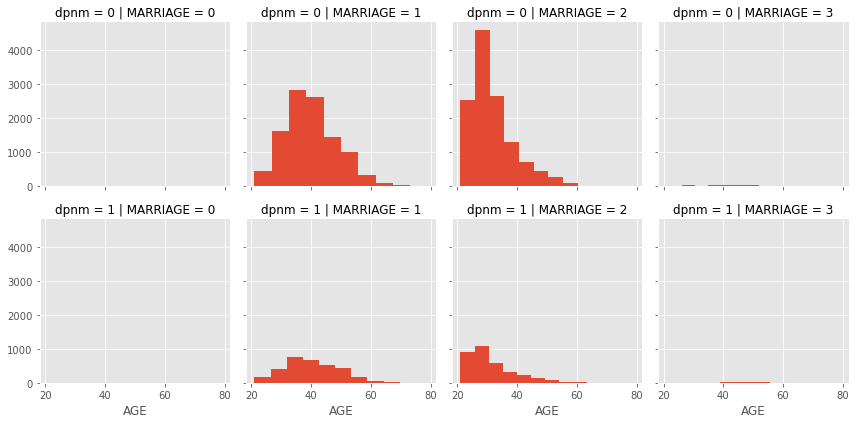

In [282]:
g = sns.FacetGrid(data, row='dpnm', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

In [283]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data[["PAY_1","PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]])
data[["PAY_1","PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]] = enc.transform(data[["PAY_1","PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]])

In [284]:
cols_to_scale = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#create and fit scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[cols_to_scale])

#scale selected data
data[cols_to_scale] = scaler.transform(data[cols_to_scale])

In [285]:
data.head(15)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm,AGE_BIN
0,1,-1.136720,2,2,1,24,4.0,4.0,1.0,1.0,0.0,0.0,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,21-30
1,2,-0.365981,2,2,2,26,1.0,4.0,2.0,2.0,2.0,3.0,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,21-30
2,3,-0.597202,2,2,2,34,2.0,2.0,2.0,2.0,2.0,2.0,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,31-40
3,4,-0.905498,2,2,1,37,2.0,2.0,2.0,2.0,2.0,2.0,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,31-40
4,5,-0.905498,1,2,1,57,1.0,2.0,1.0,2.0,2.0,2.0,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,51-60
5,6,-0.905498,1,1,2,37,2.0,2.0,2.0,2.0,2.0,2.0,0.178947,0.110856,0.152777,-0.371029,-0.340357,-0.316487,-0.191003,-0.178215,-0.259486,-0.244230,-0.248683,-0.248381,0,31-40
6,7,2.562830,1,1,2,29,2.0,2.0,2.0,2.0,2.0,2.0,4.301531,5.098086,5.739063,7.762727,7.281574,7.305617,2.978712,1.479085,1.861472,0.983852,0.585848,0.481207,0,21-30
7,8,-0.520128,2,2,2,23,2.0,1.0,1.0,2.0,2.0,1.0,-0.534359,-0.685644,-0.669262,-0.669062,-0.665674,-0.643203,-0.318999,-0.230905,-0.296801,-0.270976,-0.203716,-0.206642,0,21-30
8,9,-0.211833,2,3,1,28,2.0,2.0,4.0,2.0,2.0,2.0,-0.542385,-0.492930,-0.503332,-0.482684,-0.469082,-0.590276,-0.140952,-0.256990,-0.272265,-0.244230,-0.248683,-0.237130,0,21-30
9,10,-1.136720,1,3,2,35,0.0,0.0,0.0,0.0,1.0,1.0,-0.695642,-0.690983,-0.677929,-0.672497,-0.449114,-0.419118,-0.341942,-0.256990,-0.296801,0.522212,-0.240697,-0.293382,0,31-40


<AxesSubplot:>

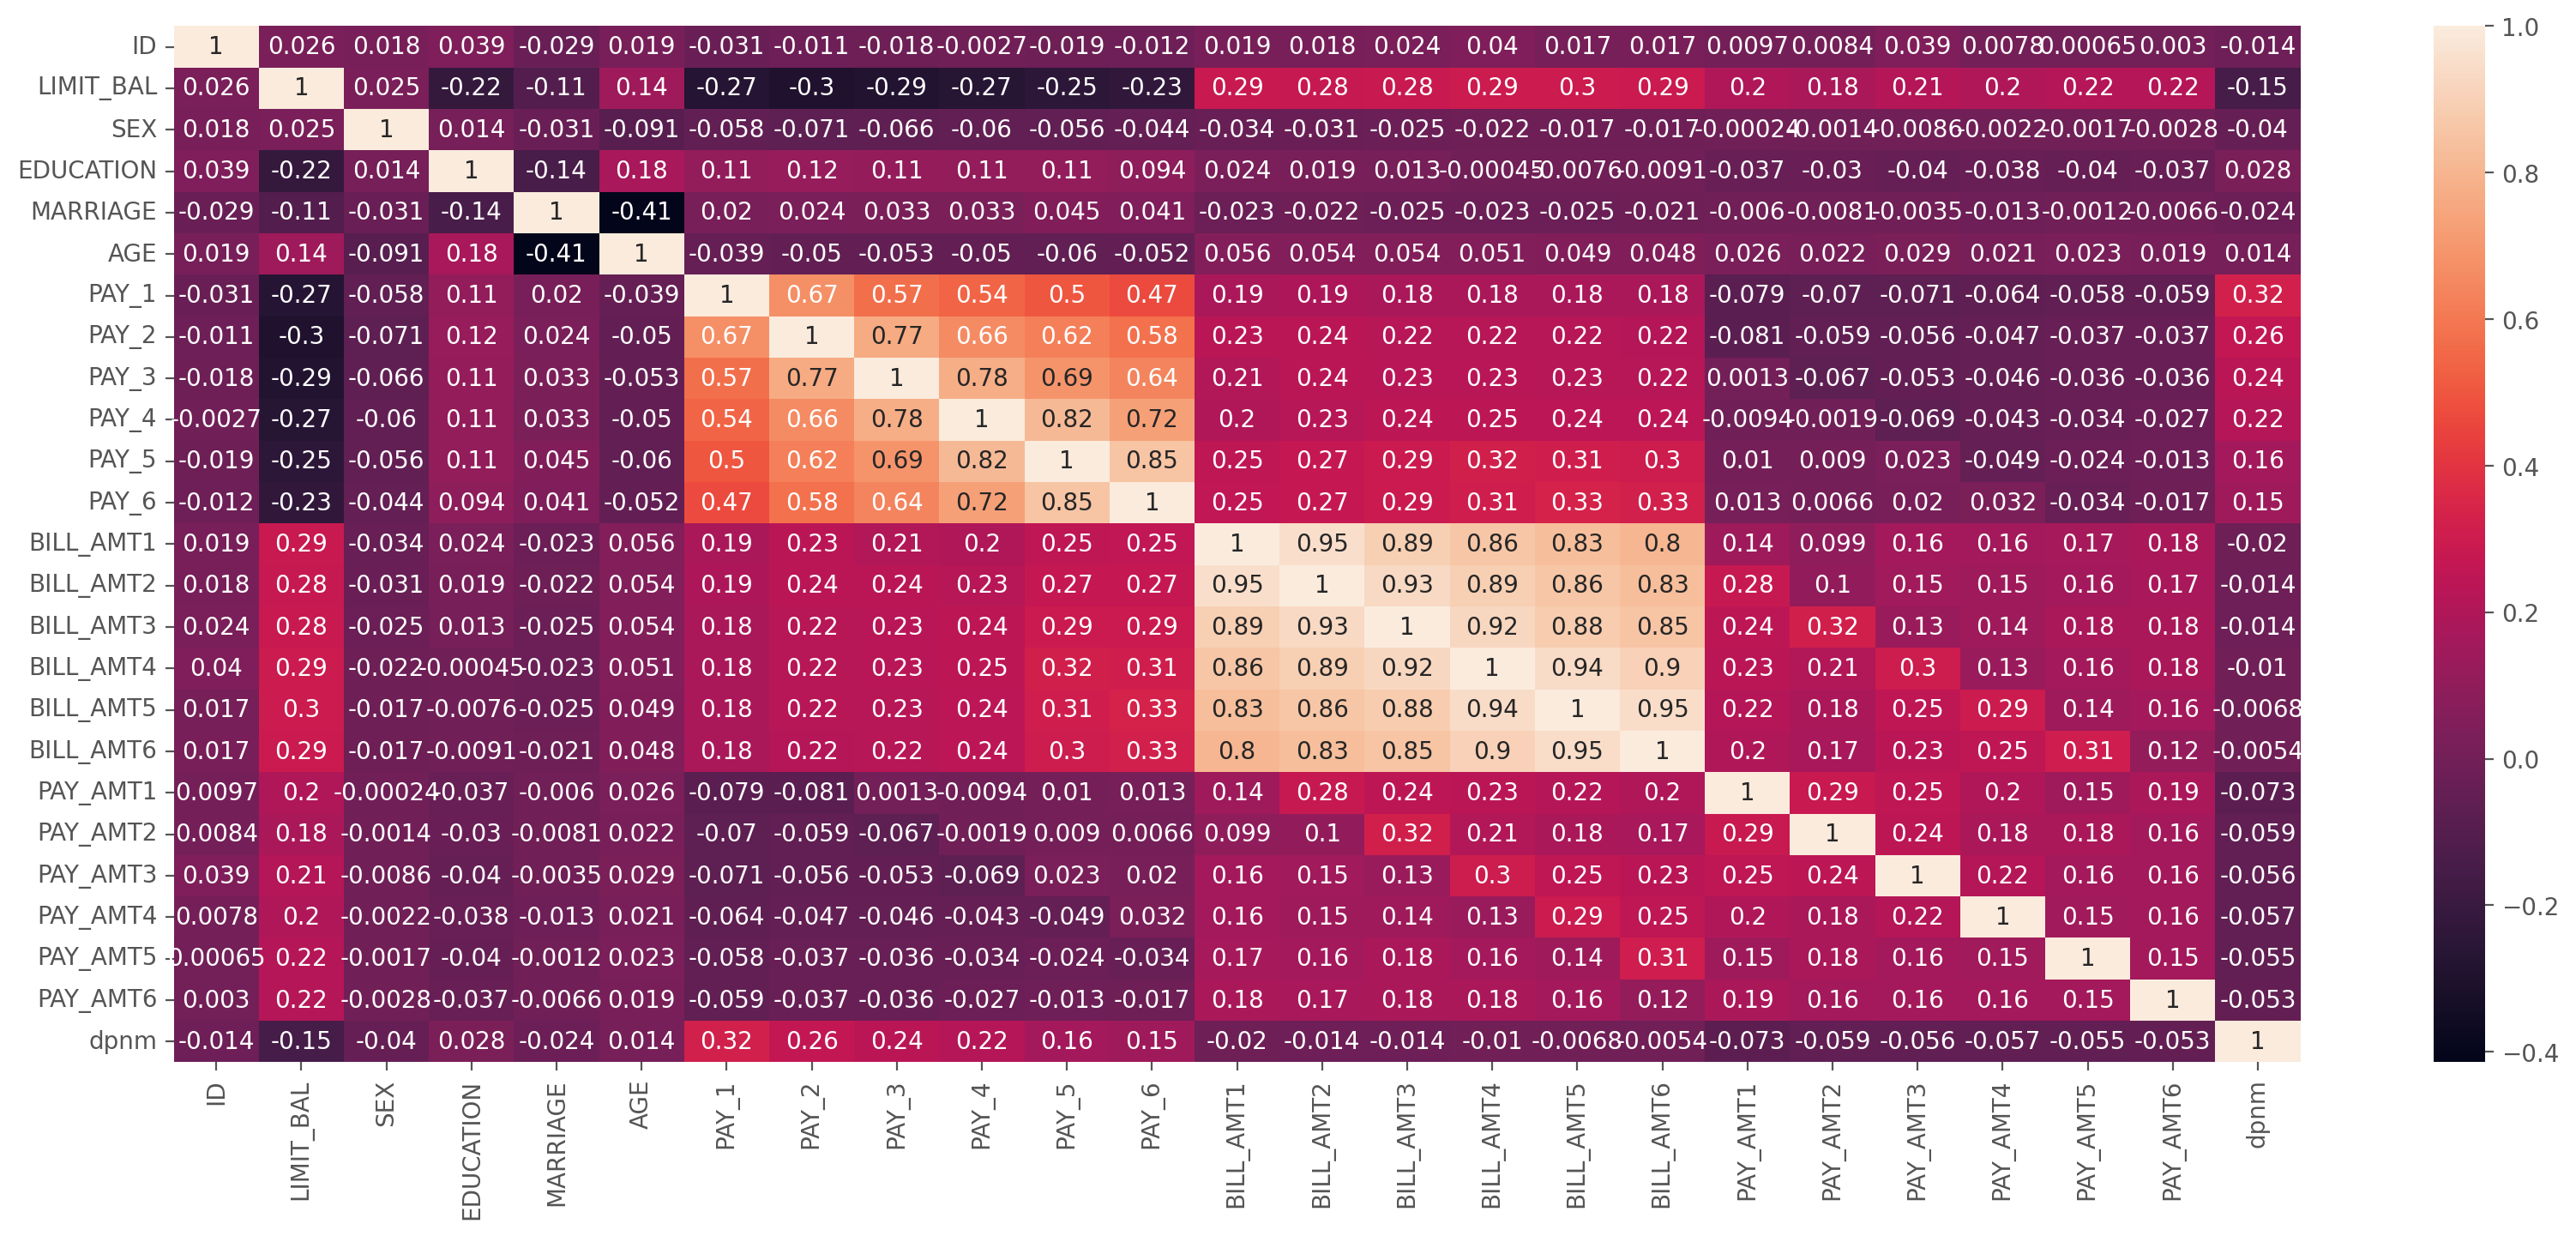

In [286]:
plt.figure(figsize = (20,8), dpi=200)
sns.heatmap(data.corr(), annot = True)

### Logistic Regression

In [241]:
# X1 = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
#           'BILL_AMT1', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
#           'PAY_AMT6']].values
# Y1 = data[['dpnm']].values

In [315]:
X1 = data[['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_1',
          'BILL_AMT1', 'PAY_AMT1']].values
Y1 = data[['dpnm']].values

In [316]:
X1

array([[-1.13672015e+00,  2.00000000e+00,  2.40000000e+01,
         4.00000000e+00, -6.42501073e-01, -3.41941619e-01],
       [-3.65980500e-01,  2.00000000e+00,  2.60000000e+01,
         1.00000000e+00, -6.59218750e-01, -3.41941619e-01],
       [-5.97202394e-01,  2.00000000e+00,  3.40000000e+01,
         2.00000000e+00, -2.98559658e-01, -2.50291579e-01],
       ...,
       [-1.05964618e+00,  2.00000000e+00,  3.70000000e+01,
         6.00000000e+00, -6.47227110e-01, -3.41941619e-01],
       [-6.74276359e-01,  3.00000000e+00,  4.10000000e+01,
         3.00000000e+00, -7.17981859e-01,  4.84431556e+00],
       [-9.05498252e-01,  2.00000000e+00,  4.60000000e+01,
         2.00000000e+00, -4.47388783e-02, -2.16481288e-01]])

In [317]:
Y1

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [318]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 2)

In [319]:
print('Training Data Shape   : ', x1_train.shape)
print('Training Labels Shape : ', y1_train.shape)
print('Testing Data Shape    : ', x1_test.shape)
print('Testing Labels Shape  : ', y1_test.shape)

Training Data Shape   :  (21000, 6)
Training Labels Shape :  (21000, 1)
Testing Data Shape    :  (9000, 6)
Testing Labels Shape  :  (9000, 1)


In [320]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x1_train, y1_train)

LogisticRegression()

In [321]:
print('Training set accuracy : ', classifier.score(x1_train, y1_train))
print('testing set  accurcay : ', classifier.score(x1_test, y1_test))

Training set accuracy :  0.8103333333333333
testing set  accurcay :  0.8121111111111111


### KNN Regressor

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  float64
 7   PAY_2      30000 non-null  float64
 8   PAY_3      30000 non-null  float64
 9   PAY_4      30000 non-null  float64
 10  PAY_5      30000 non-null  float64
 11  PAY_6      30000 non-null  float64
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [342]:
X = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
          'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
          'PAY_AMT6']].values
Y = data[['dpnm']].values

In [343]:
print('Independent feature set shape : ', X.shape)
print('Dependent feature shape       : ', Y.shape)

Independent feature set shape :  (30000, 23)
Dependent feature shape       :  (30000, 1)


In [344]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [345]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (21000, 23)
Training Labels Shape :  (21000, 1)
Testing Data Shape    :  (9000, 23)
Testing Labels Shape  :  (9000, 1)


In [346]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 10)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [347]:
print('Training Set Score : ', knn_reg.score(x_train, y_train))
print('Testing Set Score  : ', knn_reg.score(x_test, y_test))

Training Set Score :  0.17677134077619883
Testing Set Score  :  -0.006559501513389687


### KNN Classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.842
Testing Set Accuracy  :  0.7942222222222223


### Selecting Best Value For K

In [54]:
acc_train = []
acc_test  = []

for i in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train, y_train)
    
    acc_train.append(classifier.score(x_train, y_train))
    acc_test.append(classifier.score(x_test, y_test))

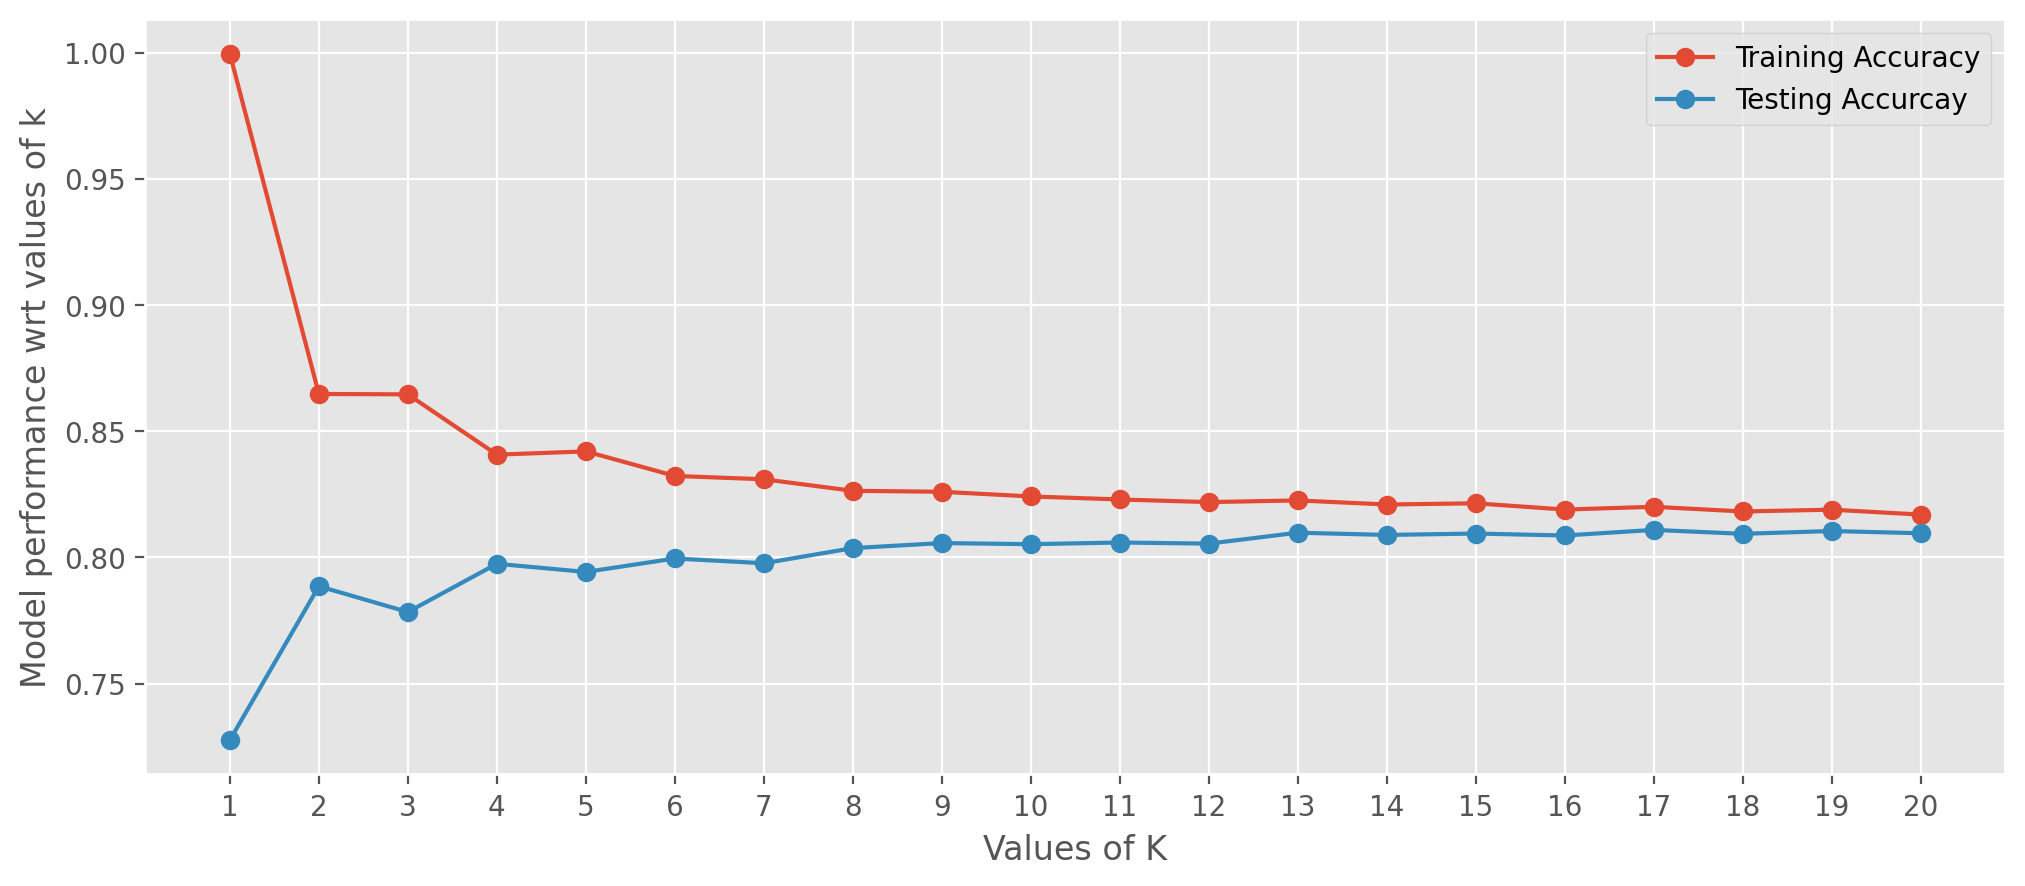

In [55]:
x = x = list(range(1,21))

plt.figure(figsize = (12,5), dpi = 200)
plt.plot(x, acc_train, '-o', label = 'Training Accuracy')
plt.plot(x, acc_test,  '-o', label = 'Testing Accurcay')

plt.xticks(x)
plt.xlabel('Values of K')
plt.ylabel('Model performance wrt values of k')
plt.legend()

In [58]:
classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(x_train, y_train)

print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.8407142857142857
Testing Set Accuracy  :  0.7974444444444444


### Decision Tree Classification

In [207]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [208]:
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

In [209]:
from sklearn.metrics import accuracy_score
print('Training set Accuracy: ', accuracy_score(y_train, pred_train))
print('Testing set Accuracy: ', accuracy_score(y_test, pred_test))

Training set Accuracy:  0.8236190476190476
Testing set Accuracy:  0.8222222222222222
